# API Example: Beeswarm Plot

This notebook demonstrates how to use `shapiq.beeswarm_plot` plot. This plot offers a global perspective on feature interactions within a model, aiding in the discovery of potential dependencies between feature values and their importance. Our beeswarm plot extends the visualization from SHAP library to include feature interactions.

In [1]:
import shapiq

{"shapiq version": shapiq.__version__}

{'shapiq version': '1.3.0'}

## General use

Beeswarm plot can be used by calling the `shapiq.beeswarm_plot` function. It takes a list of explanations and data instances as input, along with optional parameters for customization. The plot visualizes the feature interactions in a beeswarm style, where the x-axis represents the feature importance. The color of the points indicates the value of the feature, allowing for a better understanding of how feature values relate to their importance in the model's predictions. The feature interactions are sorted by their mean absolute interaction value and their names appear on the y-axis in such order.

We start by training a model and getting explanations for a set of data instances. We will use the California housing dataset for this example with a XGBoost regressor model. We will then run an explainer on the first 1000 samples of the test set and visualize the results using the beeswarm plot.

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# get the data
x_data, y_data = shapiq.datasets.load_california_housing(to_numpy=False)
feature_names = list(x_data.columns)  # get the feature names
n_features = len(feature_names)
print("Features in the dataset:", feature_names)

# train a model
x_data, y_data = x_data.values, y_data.values  # transform to numpy arrays
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
model = XGBRegressor(random_state=42, max_depth=4, n_estimators=50)
model.fit(x_train, y_train)

# evaluate the model
mse = mean_squared_error(y_test, model.predict(x_test))
r2 = r2_score(y_test, model.predict(x_test))
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# get interaction explanations
x_explain = x_test[:1000]  # get first 1000 samples
explainer = shapiq.TabularExplainer(model, data=x_test, index="FSII", max_order=3, random_state=42)
explanations = explainer.explain_X(x_explain, budget=200, n_jobs=-1)

Features in the dataset: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Mean Squared Error: 0.24441967828624162
R2 Score: 0.8134783244431429


Beeswarm plots can be now called using the `shapiq.beeswarm_plot(interaction_values_list, data)` function.

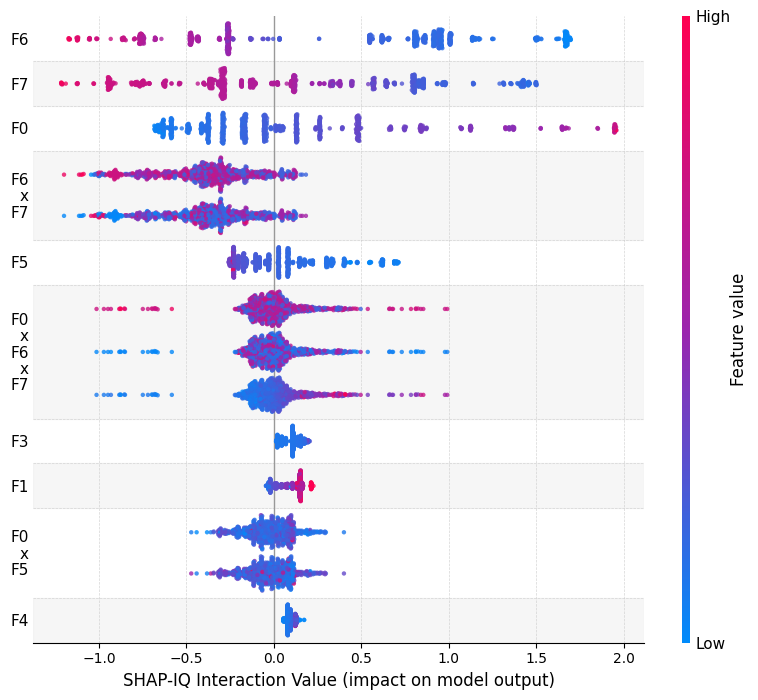

In [3]:
shapiq.beeswarm_plot(explanations, x_explain)

## Customization

The beeswarm plot can be customized in the following ways:
- `feature_names`: a list of feature names corresponding to the features in the data (in the order in which they appear in the data). If not provided, the feature indices are used (as in the example above).
- `abbreviate`: indicates whether to abbreviate the feature names.
- `row_height`: indicates the height of each row in the plot. The default value is 0.4.
- `max_display`: indicates the maximum number of interactions to be displayed in the plot. The default value is 10. If set to `None`, all interactions will be displayed.
- `alpha`: indicates the transparency of the points in the plot.
- `ax`: a matplotlib axis object to plot on. If not provided, a new figure and axis is created.
- `show`: whether to show the plot. If set to `False`, the plot will not be displayed and matplotlib axis object will be returned, which can be used to further customize the plot or save it later.

### Feature names


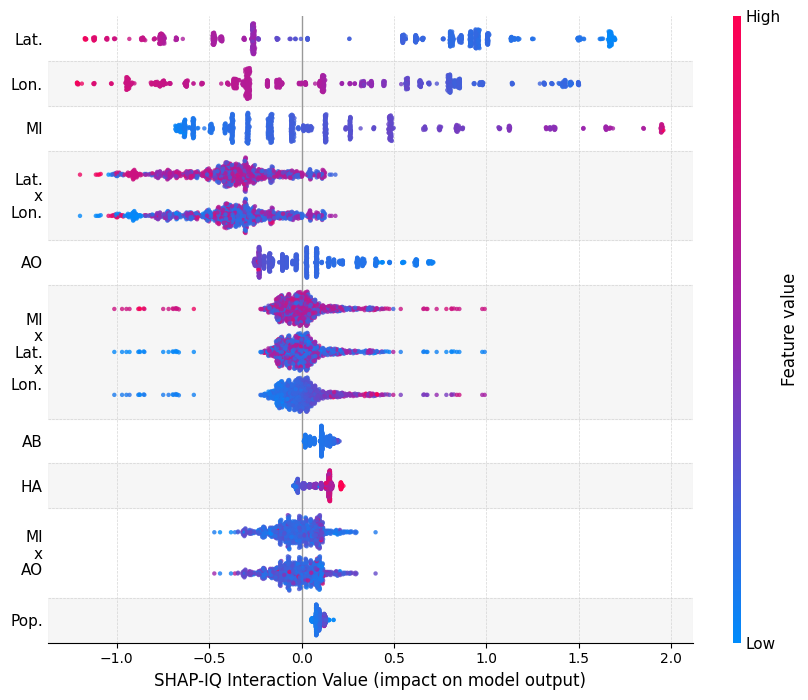

In [4]:
shapiq.beeswarm_plot(explanations, x_explain, feature_names=feature_names)

To display the full feature names, we can set the `abbreviate` parameter to `False`.

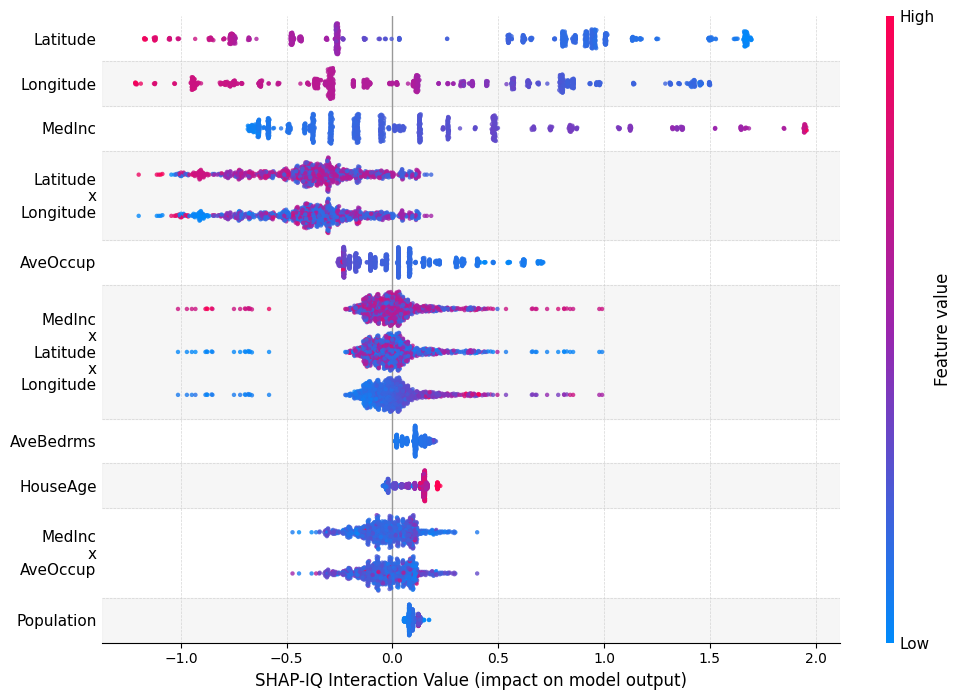

In [5]:
shapiq.beeswarm_plot(explanations, x_explain, feature_names=feature_names, abbreviate=False)

### Maximum number of interactions
The `max_display` parameter can be used to limit the number of interactions displayed in the plot. By default, it is set to 10, but we can change it to display more or fewer interactions.

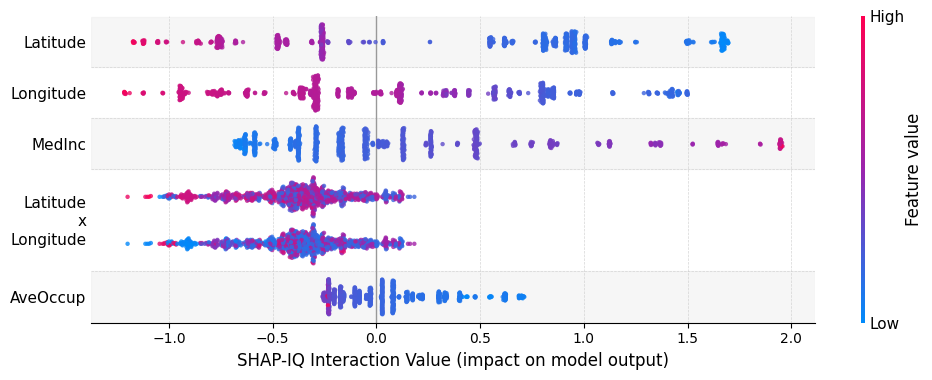

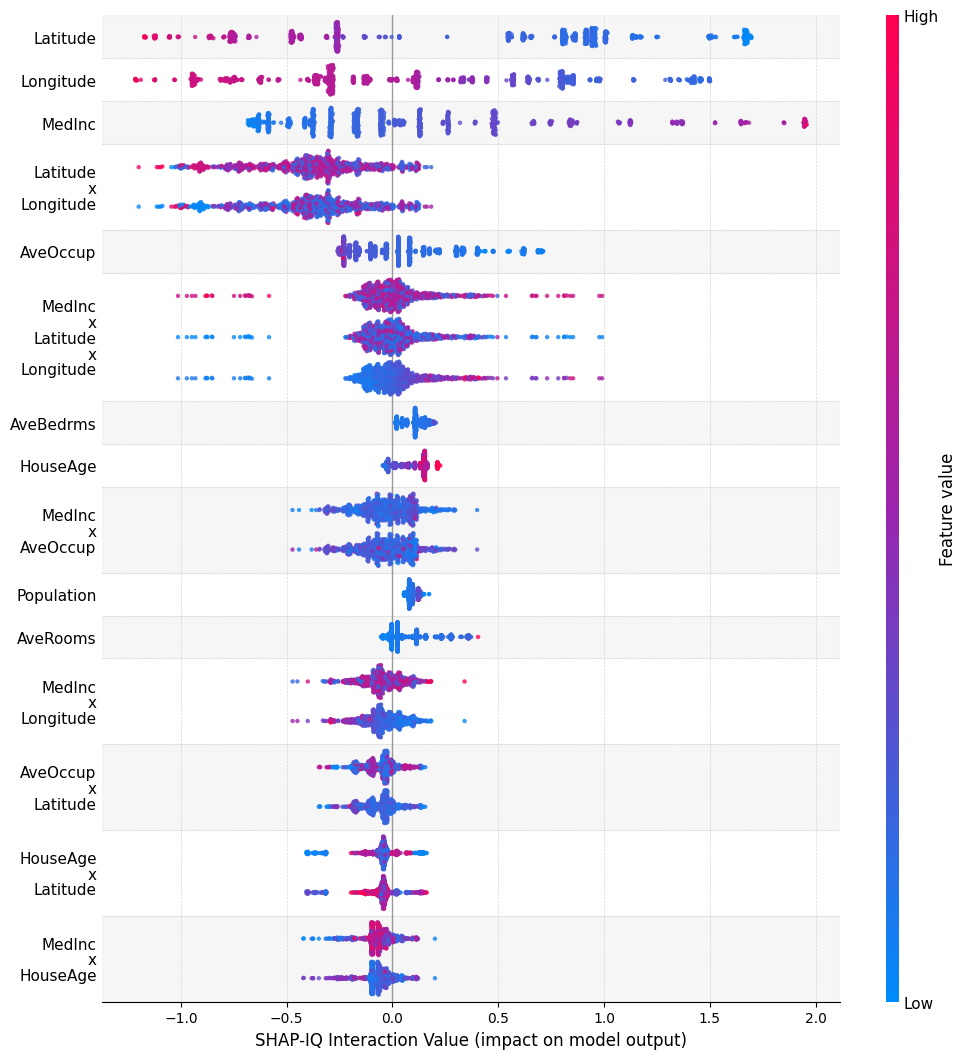

In [6]:
shapiq.beeswarm_plot(
    explanations, x_explain, feature_names=feature_names, abbreviate=False, max_display=5
)
shapiq.beeswarm_plot(
    explanations, x_explain, feature_names=feature_names, abbreviate=False, max_display=15
)

#### Row height
The `row_height` parameter can be used to adjust the height of each row in the plot. This can be useful if we want to see the data points in more detail or make the plot more compact.

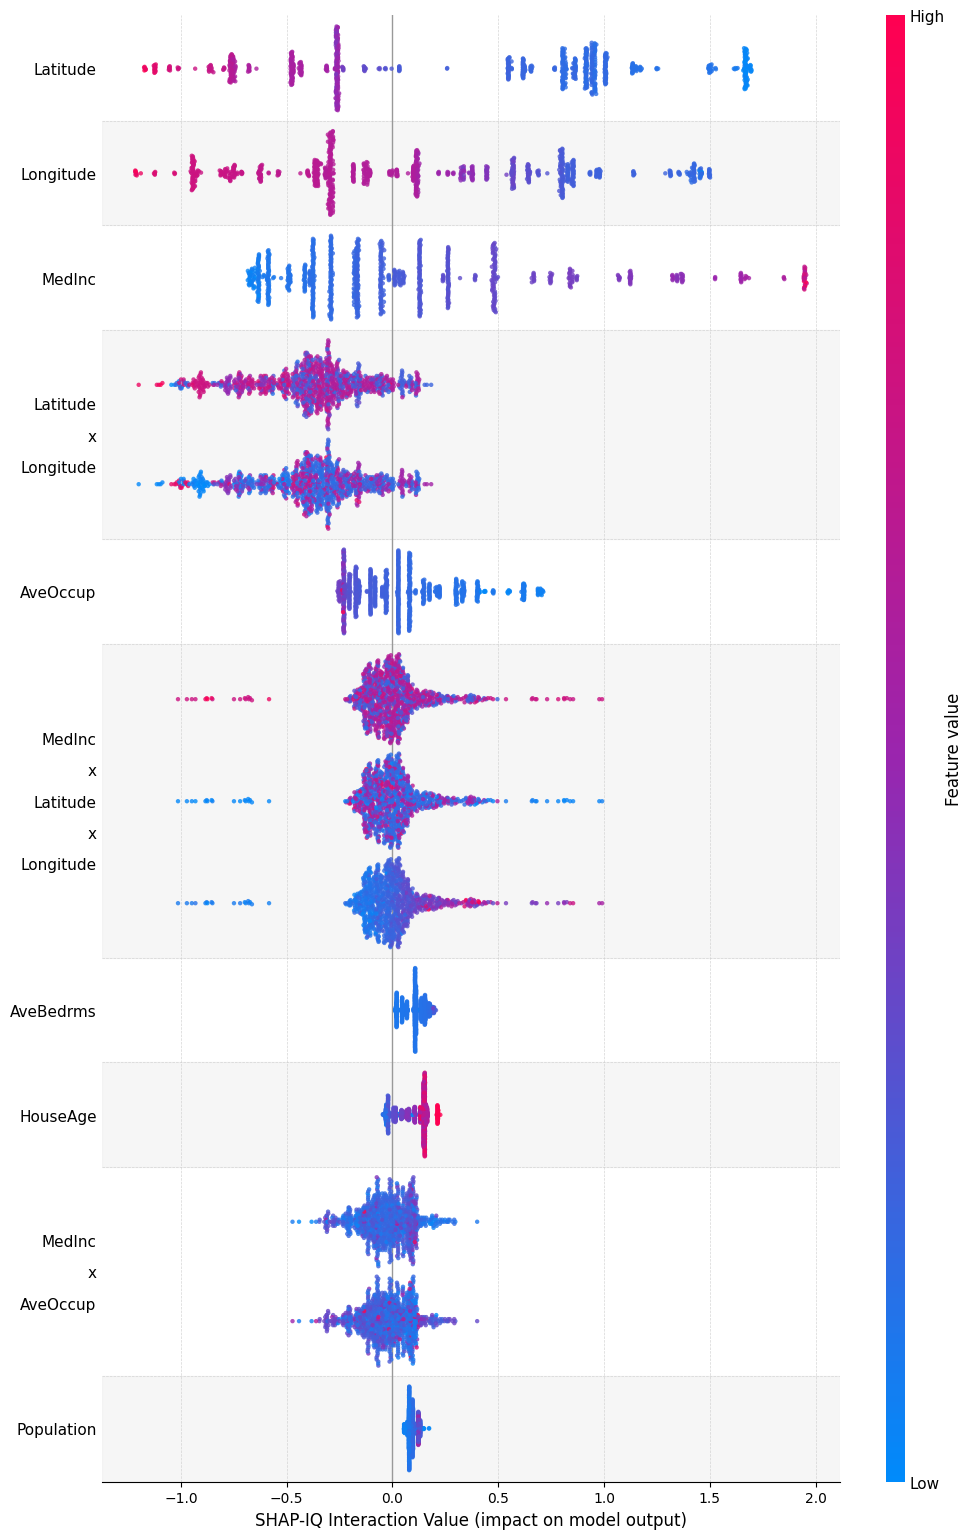

In [7]:
shapiq.beeswarm_plot(
    explanations, x_explain, feature_names=feature_names, abbreviate=False, row_height=1.0
)

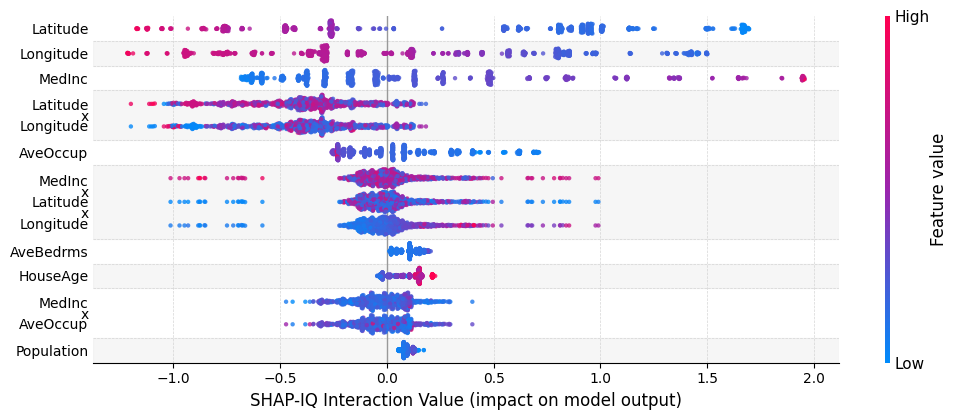

In [8]:
shapiq.beeswarm_plot(
    explanations, x_explain, feature_names=feature_names, abbreviate=False, row_height=0.2
)

### Point transparency
The `alpha` parameter can be used to adjust the transparency of the points in the plot. This can be useful if we want to see the density of the points in the plot.

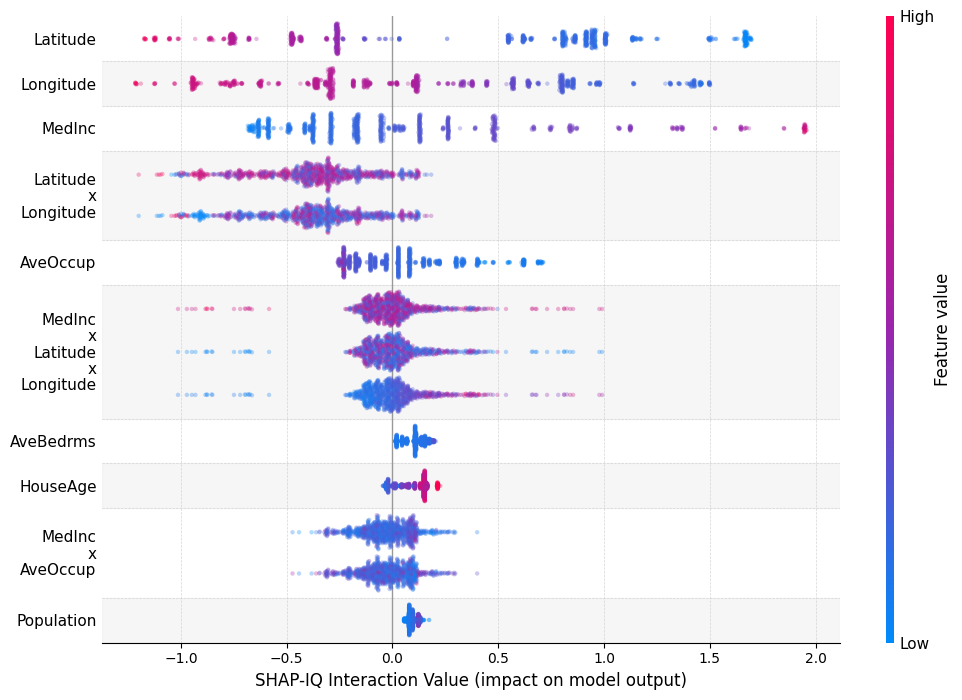

In [9]:
shapiq.beeswarm_plot(
    explanations, x_explain, feature_names=feature_names, abbreviate=False, alpha=0.3
)

### Axis
The `ax` parameter can be used to plot the beeswarm plot on a specific matplotlib axis. This can be useful if we want to have a figure of certain size or if we want to plot multiple plots on the same figure.

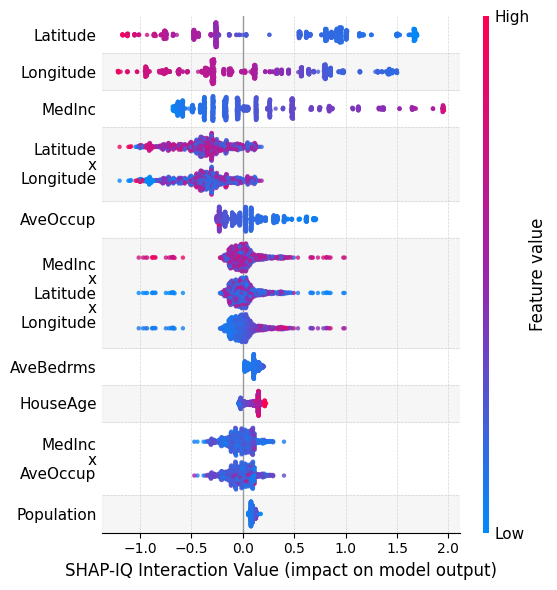

In [10]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
shapiq.beeswarm_plot(explanations, x_explain, feature_names=feature_names, abbreviate=False, ax=ax)

### Show
The `show` parameter can be used to control whether the plot is displayed or not. If set to `False`, the plot will not be displayed and a matplotlib axis object will be returned. This can be useful if we want to customize the plot further or save it later.

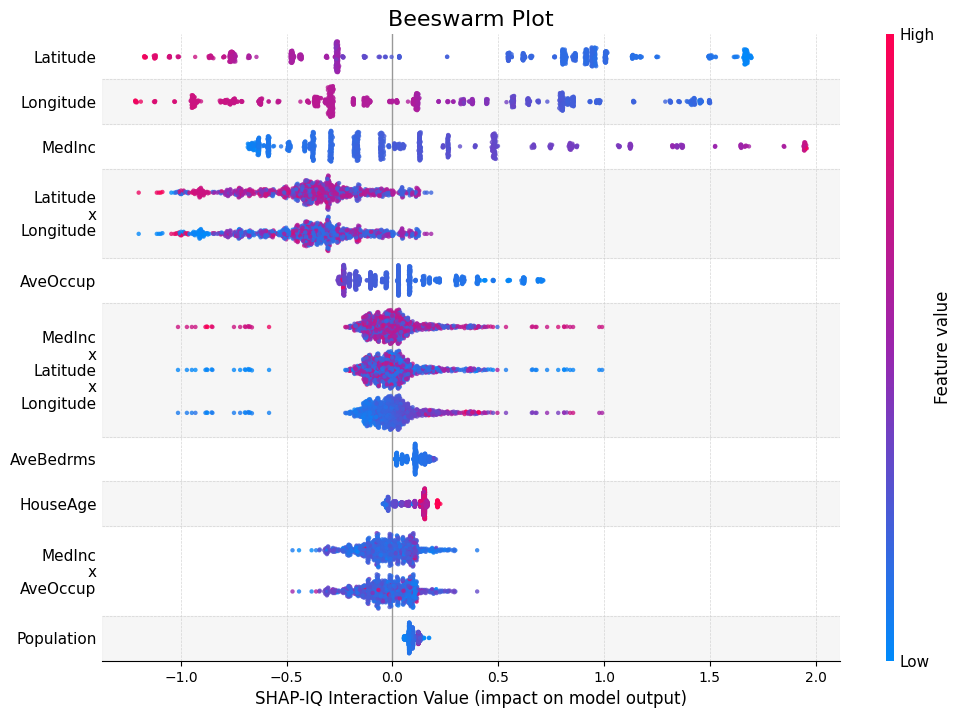

In [11]:
ax = shapiq.beeswarm_plot(
    explanations, x_explain, feature_names=feature_names, abbreviate=False, show=False
)
# we can add a title to the plot
ax.set_title("Beeswarm Plot", fontsize=16)
plt.show()